# Métodos iterativos para la solución de sistemas de ecuaciones lineales

**Objetivo.**

Describir e implementar los algoritmos de Jacobi, Gauss-Seidel y SOR para la solución de sistemas de ecuaciones lineales.

 <p xmlns:cc="http://creativecommons.org/ns#" xmlns:dct="http://purl.org/dc/terms/"><a property="dct:title" rel="cc:attributionURL" href="https://github.com/repomacti/macti/tree/main/notebooks/Algebra_Lineal_01">MACTI-Algebra_Lineal_01</a> by <a rel="cc:attributionURL dct:creator" property="cc:attributionName" href="https://www.macti.unam.mx">Luis M. de la Cruz</a> is licensed under <a href="http://creativecommons.org/licenses/by-sa/4.0/?ref=chooser-v1" target="_blank" rel="license noopener noreferrer" style="display:inline-block;">Attribution-ShareAlike 4.0 International<img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1"></a></p> 

Trabajo realizado con el apoyo del Programa UNAM-DGAPA-PAPIME PE101922

In [1]:
import numpy as np
import ipywidgets as widgets
import macti.visual as mvis

# Cruce de dos rectas.

Las siguientes dos rectas se cruzan en algún punto.

$$
\begin{array}{ccc}
3x + 2y & = &2 \\
2x + 6y & = &-8
\end{array}
$$

Las ecuaciones de las rectas se pueden escribir como:

$$
\begin{array}{ccc}
\dfrac{3}{2}x + y & = & 1 \\
\dfrac{2}{6}x + y & = & -\dfrac{8}{6}
\end{array} \Longrightarrow
\begin{array}{ccc}
y = m_1 x + b_1 \\
y = m_2 x + b_2
\end{array} \text{ donde }
\begin{array}{ccc}
m_1 = -\dfrac{3}{2} & b_1 = 1 \\
m_2 = -\dfrac{2}{6} & b_2 = -\dfrac{8}{6}
\end{array}
$$

Ahora realizaremos la gráfica de las rectas:

## Definición y gráfica de las rectas

<div class="alert alert-success">

## **Ejercicio 1.**

<font color="Black"> En la siguiente celda se define el domino $x$ para las líneas rectas, los parámetros para construir la línea recta 1 y su construcción. De la misma manera define los parámetros y construye la recta 2. Si todo lo  hiciste correctamente, la celda de graficación mostrará las gráficas de las líneas rectas.</font>
</div>

In [2]:
from macti.evaluation import FileAnswer, Quizz
#file_anser = FileAnswer()
#quizz = Quizz()

In [3]:
# Dominio
x = np.linspace(-3,6,10)

# Línea recta 1
m1 = -3/2
b1 = 1
y1 = m1 * x + b1

# Línea recta 2
# m2 = ...
# b2 = ...
# y2 = ...

### BEGIN SOLUTION
m2 = -2/6
b2 = -8/6
y2 = m2 * x + b2

#file_answer('1', m2, 'm2 incorrecta revisa el valor del parámetro.')
#file_answer('2', b2, 'b2 incorrecta revisa el valor del parámetro.')
#file_answer('3', y2, 'y2 no está definida correctamente.')
### END SOLUTION

In [4]:
#quizz.eval_numeric('1', m2)
#quizz.eval_numeric('2', b2)
#quizz.eval_numeric('3', y2)

**Gráfica de las líneas rectas.**

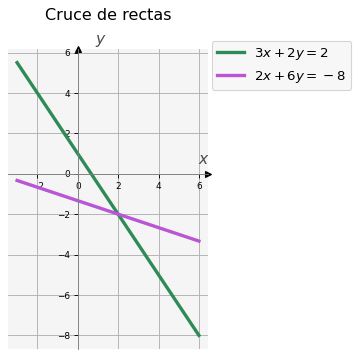

In [5]:
v = mvis.Plotter(1,1,[dict(aspect='equal')],title='Cruce de rectas') 
v.set_coordsys(1)
v.plot(1, x, y1, lw = 3, c = 'seagreen', label = '$3x+2y=2$') # Línea recta 1
v.plot(1, x, y2, lw = 3, c = 'mediumorchid',label = '$2x+6y=-8$') # Línea recta 2
v.legend(ncol = 1, frameon=True, loc='best', bbox_to_anchor=(1.75, 1.05))
v.grid()
v.show()

## Sistemas lineales.

Las ecuaciones de las rectas se pueden escribir en forma de un sistema lineal:

$$
\left[
\begin{array}{cc}
3 & 2 \\
2 & 6
\end{array} \right]
\left[
\begin{array}{c}
x_{0} \\
x_{1}
\end{array} \right] =
\left[
\begin{array}{c}
2 \\ 
-8
\end{array} \right]
\tag{1}
$$

Podemos calcular el cruce de las rectas resolviendo el sistema lineal:

<div class="alert alert-info">

## **Ejemplo 1.**

<font color="Black"> Definir el sistema lineal y resolverlo. Posteriomente graficar las rectas y el punto solución.</font>
</div>

El sistema lineal se puede resolver directamente con la función `np.linalg.solve()` como sigue:

In [6]:
A = np.array([[3, 2],[2,6]] )
b = np.array([[2,-8]])
print("Matriz A : \n",A)
print("Vector b : \n", b)

sol = np.linalg.solve(A,b[0]) # Función del módulo linalg para resolver el sistema
print("Solución del sistema: ", sol)

Matriz A : 
 [[3 2]
 [2 6]]
Vector b : 
 [[ 2 -8]]
Solución del sistema:  [ 2. -2.]


**Gráfica de las líneas rectas y el punto de cruce (solución).**

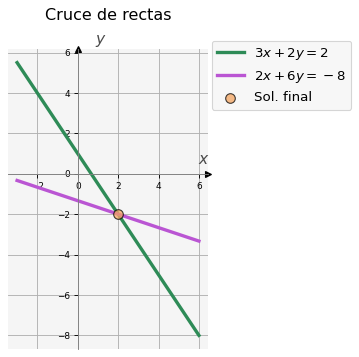

In [7]:
v = mvis.Plotter(1,1,[dict(aspect='equal')],title='Cruce de rectas') 
v.set_coordsys(1)
v.plot(1, x, y1, lw = 3, c = 'seagreen', label = '$3x+2y=2$') # Línea recta 1
v.plot(1, x, y2, lw = 3, c = 'mediumorchid', label = '$2x+6y=-8$') # Línea recta 2
v.scatter(1, sol[0], sol[1], fc='sandybrown', ec='k', s = 75, alpha=0.75, zorder=5, label='Sol. final') # Solución
v.legend(ncol = 1, frameon=True, loc='best', bbox_to_anchor=(1.75, 1.05))
v.grid()
v.show()

En general, un sistema de ecuaciones lineales de $n \times n$ se escribe como sigue:

$$
\begin{array}{ccccccc}
a_{11}x_1 & + & a_{12}x_2 & +  \dots  + & a_{1n}x_n & = & b_1 \\
a_{21}x_1 & + & a_{22}x_2 & +  \dots + & a_{2n}x_n & = & b_2 \\
\vdots & & \vdots &  & \vdots & & \vdots \\
a_{i1}x_1 & + & a_{i2}x_2 & +  \dots + & a_{in}x_n & = & b_i \\
\vdots & & \vdots &  & \vdots & & \vdots \\
a_{n1}x_1 & + & a_{n2}x_2 & + \dots + & a_{nn}x_n & = & b_n
\end{array}
$$

Es posible usar diferentes métodos para resolver este tipo de sistemas. Veamos tres de ellos.

# Método de Jacobi

* En este método, de la primera ecuación se despeja $x_1$; de la segunda ecuación se despeja $x_2$; y a sí sucesivamente, de tal manera que obtenemos:
$$
\begin{eqnarray*}
	x_1 & = &\left( b_1 - (a_{12}x_2 +  \dots  + a_{1n}x_n) \right) / a_{11}  \\
	x_2 & = &\left( b_2 - (a_{21}x_1 +  \dots  + a_{2n}x_n) \right) / a_{22} \\
	\vdots & & \vdots \\
	x_i & = &\left( b_i - (a_{i1}x_1 +  \dots  + a_{in}x_n) \right) / a_{ii} \\
	\vdots & & \vdots \\
	x_n & = &\left( b_n - (a_{n1}x_1 +  \dots  + a_{nn-1}x_{n-1}) \right) / a_{nn}
\end{eqnarray*}
$$

* Suponemos ahora que tenemos una solución inicial aproximada $\mathbf{x}^0 = [x_1^0, \dots, x_n^0]$. Usando esta solución inicial, es posible hacer una nueva aproximación para obtener  $\mathbf{x}^1 = [x_1^1, \dots, x_n^1]$ como sigue:

$$
\begin{eqnarray*}
	x_1^1 & = &\left( b_1 - (a_{12}x_2^0 +  \dots  + a_{1n}x_n^0) \right) / a_{11}  \\
	x_2^1 & = &\left( b_2 - (a_{21}x_1^0 +  \dots  + a_{2n}x_n^0) \right) / a_{22} \\
	\vdots & & \vdots \\
	x_i^1 & = &\left( b_i - (a_{i1}x_1^0 +  \dots  + a_{in}x_n^0) \right) / a_{ii} \\
	\vdots & & \vdots \\
	x_n^1 & = &\left( b_n - (a_{n1}x_1^0 +  \dots  + a_{nn-1}x_{n-1}^0) \right) / a_{nn}
\end{eqnarray*}
$$

* En general para $i = 1, \dots, n$ y $k = 1, 2, \dots$ tenemos:

$$
x_i^k = \frac{1}{a_{i,i}} \left(b_i -  \sum_{j \neq i} a_{i,j} x_j^{k-1} \right)
$$

* En términos de matrices, la **iteración de Jacobi** se escribe:
$$
\mathbf{x}^k = -\mathbf{D}^{-1} \mathbf{B}\mathbf{x}^{k-1} + \mathbf{D}^{-1} \mathbf{b}
$$

donde $\mathbf{D}$ es la matriz diagonal y $\mathbf{B} = \mathbf{A} - \mathbf{D}$.

* El cálculo de cada componente $x_i^k$ es independiente de las otras componentes, por lo que este método se conoce también como de  *desplazamientos simultáneos*.


## Algoritmo Jacobi.
En general, podemos definir el siguiente algoritmo para el método de Jacobi.
<center>
<img src="./Jacobi.png"  width='500px'/>
</center>

<div class="alert alert-info">

Observa que en este algoritmo hay un ciclo `while` el cual termina cuando el error es menor o igual que una tolerancia `tol` o se ha alcanzado un número máximo de iteraciones `kmax`. En la línea **11** se calcula el error, que en términos matemáticos se define como $error = || \mathbf{x}^k - \mathbf{x}||$ donde $\mathbf{x}^k$ es la aproximación de la iteración $k$-ésima y $\mathbf{x}$ es la solución exacta. En muchas ocasiones no se tiene acceso a la solución exacta por lo que se compara con la solución de la iteración anterior, es decir $error = || \mathbf{x}^k - \mathbf{x}^{k-1}||$. En los ejemplos que siguen si tenemos la solución exacta, por lo que haremos la comparación con ella.
</div>

## Implementación.

In [8]:
def jacobi(A,b,tol,kmax,xi, yi):
    N = len(b[0])
    xnew = np.zeros(N)
    xold = np.zeros(N)
    x = np.array([2, -2]) # Solución exacta
    
    # Solución inicial
    xold[0] = xi
    xold[1] = yi
    
    xs = [xi]
    ys = [yi]
    
    e = 10
    error = [] 
    
    k = 0
    print('{:^2} {:^10} {:^12} {:^12}'.format(' i ', 'Error', 'x0', 'x1'))
    while(e > tol and k < kmax) :
        for i in range(0,N): # se puede hacer en paralelo
            xnew[i] = 0
            for j in range(0,i):
                xnew[i] += A[i,j] * xold[j]
            for j in range(i+1,N):
                xnew[i] += A[i,j] * xold[j]                
            xnew[i] = (b[0,i] - xnew[i]) / A[i,i]
        
        # Almacenamos la solución actual
        xs.append(xnew[0])
        ys.append(xnew[1])
        
        e = np.linalg.norm(xnew-x, 2) # Cálculo del error
        error.append(e)
        k += 1
        xold[:] = xnew[:]
        print('{:2d} {:10.9f} ({:10.9f}, {:10.9f})'.format(k, e, xnew[0], xnew[1]))
    return xnew, np.array(xs), np.array(ys), error, k

<div class="alert alert-info">

## **Ejemplo 3. Aplicación del método de Jacobi.**

<font color="Black"> Haciendo uso de la función `jacobi` definida en la celda anterior, aproxima la solución del sistema de ecuaciones (1). Utiliza la solución inicial `(xi, yi)` = $(-2, 2)$, una tolerancia `tol` = $1 \times 10^{-5}$ y `kmax` = $50$ iteraciones.</font>
</div>

In [9]:
# Solución inicial
(xi, yi) = (-2, 2)
tol = 1e-5
kmax = 50

# Ejecución del método de Jacobi
solJ, xs, ys, eJ, itJ = jacobi(A, b, tol, kmax, xi, yi)

 i    Error         x0           x1     
 1 2.981423970 (-0.666666667, -0.666666667)
 2 1.257078722 (1.111111111, -1.111111111)
 3 0.662538660 (1.407407407, -1.703703704)
 4 0.279350827 (1.802469136, -1.802469136)
 5 0.147230813 (1.868312757, -1.934156379)
 6 0.062077962 (1.956104252, -1.956104252)
 7 0.032717959 (1.970736168, -1.985368084)
 8 0.013795103 (1.990245389, -1.990245389)
 9 0.007270657 (1.993496926, -1.996748463)
10 0.003065578 (1.997832309, -1.997832309)
11 0.001615702 (1.998554873, -1.999277436)
12 0.000681240 (1.999518291, -1.999518291)
13 0.000359045 (1.999678861, -1.999839430)
14 0.000151387 (1.999892954, -1.999892954)
15 0.000079788 (1.999928636, -1.999964318)
16 0.000033641 (1.999976212, -1.999976212)
17 0.000017731 (1.999984141, -1.999992071)
18 0.000007476 (1.999994714, -1.999994714)


<div class="alert alert-info">

Observa que la función `jacobi()` regresa 5 valores: 
* `solJ` la solución obtenida, 
* `xs` y `ys` componentes de las soluciones aproximadas en cada paso, 
* `eJ` el error con respecto a la solución exacta e 
* `itJ` el número de iteraciones realizadas.
</div>

A continuación graficamos como es que la solución se va aproximando con este método.

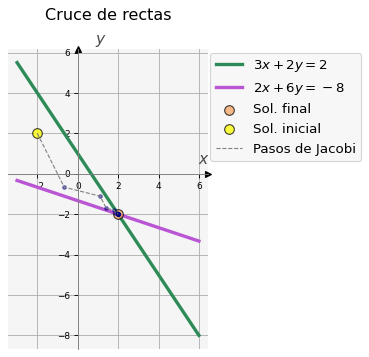

In [10]:
v = mvis.Plotter(1,1,[dict(aspect='equal')],title='Cruce de rectas') 
v.set_coordsys(1)
v.plot(1, x, y1, lw = 3, c = 'seagreen', label = '$3x+2y=2$') # Línea recta 1
v.plot(1, x, y2, lw = 3, c = 'mediumorchid', label = '$2x+6y=-8$') # Línea recta 2
v.scatter(1, sol[0], sol[1], fc='sandybrown', ec='k', s = 75, alpha=0.75, zorder=5, label='Sol. final') # Solución

# Graficamos los pasos
v.scatter(1, xs[0], ys[0], fc='yellow', ec='k', s = 75, alpha=0.75, zorder=8, label='Sol. inicial')
v.scatter(1, xs[1:], ys[1:], c='navy', s = 10, alpha=0.5, zorder=8)
v.plot(1, xs, ys, c='grey', ls = '--', lw=1.0, zorder=8, label='Pasos de Jacobi')

v.legend(ncol = 1, frameon=True, loc='best', bbox_to_anchor=(1.80, 1.01))
v.grid()
v.show()

## Cálculo del error

* Definimos $e_i^k = x_i^k - x_i$ como la diferencia entre la $i$-ésima componente  de la solución exacta y la $i$-ésima componente de la $k$-ésima iteración, de tal manera que $\mathbf{e} = [e_1, \dots, e_n]^T$ es el vector error.

* Aplicando una vez la iteración de Jacobi para $x_i$ y $x_i^{k+1}$ podemos escribir la diferencia como sigue:

$$
\begin{eqnarray*}
\left| e_i^{k+1} \right| & = &\left| x_i^{k+1} - x_i  \right| \\
\left| e_i^{k+1} \right| & = & \left|
\frac{1}{a_{i,i}} \left(b_i - \sum_{j \neq i} a_{i,j} x_j^{k} \right) -
\frac{1}{a_{i,i}} \left(b_i - \sum_{j \neq i} a_{i,j} x_j \right) \right| \\
\left| e_i^{k+1} \right| & = & \left| -\sum_{j \neq i} \frac{a_{i,j}}{a_{i,i}} (x_j^k - x_j)\right| \\
\left| e_i^{k+1} \right| & = & \left| -\sum_{j \neq i} \frac{a_{i,j}}{a_{i,i}} e_j^k \right| 
\le \sum_{j \neq i} \left| \frac{a_{i,j}}{a_{i,i}} \right| || \mathbf{e}^k ||_\infty, \qquad \forall i, k .
\end{eqnarray*}
$$

* En particular:
$$
\max_{1 \le i \le n} \left( \left| e_i^{k+1} \right| \right) =  || \mathbf{e}^{k+1} ||_\infty
 \le \sum_{j \neq i} \left| \frac{a_{i,j}}{a_{i,i}} \right| || \mathbf{e}^k ||_\infty
$$

* Definimos $\displaystyle K = \max_{1 \le i \le n} \sum_{j \neq i} \left| \frac{a_{i,j}}{a_{i,i}} \right|$ entonces:

$$
\begin{eqnarray*}
|| \mathbf{e}^{k+1} ||_\infty & \le &  K || \mathbf{e}^{k} ||_\infty \le K \left( K || \mathbf{e}^{k-1} ||_\infty \right) \le
\dots \le K^k || \mathbf{e}^{1} ||_\infty \\
|| \mathbf{e}^{k+1} ||_\infty & \le &  K^k || \mathbf{e}^{1} ||_\infty
\end{eqnarray*}
$$

* Si $K < 1$ entonces $\mathbf{e}^{k} \rightarrow 0$ cuando $k \rightarrow \infty$

* La condición $K < 1$ implica:
$$
\sum_{j \neq i} |a_{i,j}| < |a_{i,i}|, \forall i
$$

A continuación graficamos el error que se va obteniendo en cada paso del método:

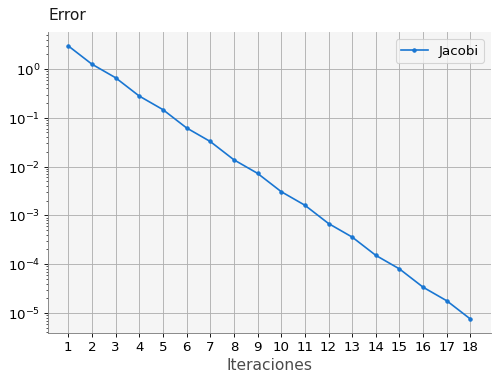

In [11]:
# Lista con el número de las iteraciones
l_itJ = list(range(1,itJ+1)) 

# Parámetros para los ejes
a_p = dict(yscale='log', xlabel='Iteraciones', xticks = l_itJ)

# Gráfica del error
v = mvis.Plotter(1,1,[a_p]) 
v.axes(1).set_title('Error', loc='left')
v.plot(1, l_itJ, eJ, marker='.', label='Jacobi') # Error eJ
v.legend()
v.grid()

# Método de Gauss-Seidel

* La principal diferencia con el método de Jacobi es que las ecuaciones se analizan en un orden determinado.

* Por ejemplo, si realizamos el cálculo en orden ascendente y ya hemos evaluado $x_1$ y $x_2$, para evaluar $x_3$ haríamos lo siguiente:}
$$
\begin{eqnarray*}
\underline{x_1^1} & = &\left( b_1 - (a_{12}x_2^0 + a_{13} x_3^0 + \dots  + a_{1n}x_n^0) \right) / a_{11}  \\
\underline{x_2^1} & = &\left( b_2 - (a_{21}\underline{x_1^1} + a_{23}x_3^0 + \dots  + a_{2n}x_n^0) \right) / a_{22} \\
x_3 & = &\left( b_3 - (a_{31}\underline{x_1^1} + a_{32}\underline{x_2^1} + \dots  + a_{3n}x_n^0)\right) / a_{22}
\end{eqnarray*}
$$

* En general la fórmula del método es como sigue:
$$
x_i^k = \frac{1}{a_{i,i}} \left(b_i -  \sum_{j < i} a_{i,j} \underline{x_j^{k}} 
- \sum_{j > i} a_{i,j} x_j^{k-1} \right) 
$$   

* Este algoritmo es serial dado que cada componente depende de que las componentes previas se hayan calculado (*desplazamientos sucesivos*).

* El valor de la nueva iteración $\mathbf{x}^k$ depende del orden en que se examinan las componentes. Si se cambia el orden, el valor de $\mathbf{x}^k$ cambia.


## Algoritmo Gauss-Seidel.
En general, podemos definir el siguiente algoritmo para el método de Gauss-Seidel.

<center>
<img src="./Gauss_Seidel.png"  width='500px'/>
</center>

<div class="alert alert-info">
Se aplican los mismo comentarios que para el algoritmo de Jacobi.
</div>

## Implementación.

In [12]:
def gauss_seidel(A,b,tol,kmax,xi,yi):
    N = len(b[0])
    xnew = np.zeros(N)
    xold = np.zeros(N)
    x = np.array([2, -2]) # Solución exacta

    # Solución inicial
    xold[0] = xi
    xold[1] = yi

    xs = [xi]
    ys = [yi]
    
    e = 10
    error = [] 
    
    k = 0
    print('{:^2} {:^10} {:^12} {:^12}'.format(' i ', 'Error', 'x0', 'x1'))
    while(e > tol and k < kmax) :
        for i in range(0,N): # se puede hacer en paralelo
            xnew[i] = 0
            for j in range(0,i):
                xnew[i] += A[i,j] * xnew[j]
            for j in range(i+1,N):
                xnew[i] += A[i,j] * xold[j]                
            xnew[i] = (b[0,i] - xnew[i]) / A[i,i]
            
        # Almacenamos la solución actual
        xs.append(xnew[0])
        ys.append(xnew[1])

        e = np.linalg.norm(xnew-x,2) # Cálculo del error
        error.append(e)
        k += 1
        xold[:] = xnew[:]
        print('{:2d} {:10.9f} ({:10.9f}, {:10.9f})'.format(k, e, xnew[0], xnew[1]))
    return xnew, np.array(xs), np.array(ys), error, k

<div class="alert alert-success">

## **Ejercicio 2.**

<font color="Black">Haciendo uso de la función `gauss_seidel()` definida en la celda anterior, aproxima la solución del sistema de ecuaciones del Ejemplo 1. Utiliza la solución inicial `(xi, yi) =` $(-2, 2)$, una tolerancia `tol` = $1 \times 10^{-5}$ y `kmax` = $50$ iteraciones. 
Utiliza las variables `solG`, `xs`, `ys`, `eG` e `itG` para almacenar la salida de la función `gauss_seidel()`.
Posteriormente grafica las rectas y cómo se va calculando la solución con este método (puedes usar el mismo código que en el caso de Jacobi). Grafica también los errores para el método de Jacobi y para el de Gauss-Seidel, deberías obtener una imagen como la siguiente:
    
<img src='error_JGS.png' width=450px height=auto>
</font>

</div>

**Cálculo de la solución con Gauss-Seidel**

In [13]:
# Solución inicial
# xi, yi = 
# tol = 
# kmax = 

# Método de Gauss-Seidel
# ...

### BEGIN SOLUTION
# Solución inicial
xi, yi = -2, 2
tol = 1e-5
kmax = 50

# Método de Gauss-Seidel
solG, xs, ys, eG, itG = gauss_seidel(A, b, tol, kmax, xi, yi)

#file_answer.write('4', solG, 'solG es incorrecta: revisa la llamada y ejecución de la función gauss_seidel() así como sus parámetros de entrada.')
#file_answer.write('5', eG[-1], 'eG[-1] es incorrecto: revisa la llamada y ejecución de la función gauss_seidel() así como sus parámetros de entrada.')
#file_answer.write('6', itG, 'itG es incorrector: revisa la llamada y ejecución de la función gauss_seidel() así como sus parámetros de entrada.')

### END SOLUTION

 i    Error         x0           x1     
 1 2.810913476 (-0.666666667, -1.111111111)
 2 0.624647439 (1.407407407, -1.802469136)
 3 0.138810542 (1.868312757, -1.956104252)
 4 0.030846787 (1.970736168, -1.990245389)
 5 0.006854842 (1.993496926, -1.997832309)
 6 0.001523298 (1.998554873, -1.999518291)
 7 0.000338511 (1.999678861, -1.999892954)
 8 0.000075225 (1.999928636, -1.999976212)
 9 0.000016717 (1.999984141, -1.999994714)
10 0.000003715 (1.999996476, -1.999998825)


In [14]:
#quizz.eval_numeric('4', solG)
#quizz.eval_numeric('5', eG[-1])
#quizz.eval_numeric('6', itG)

**Gráfica de las rectas, la solución y los pasos realizados**

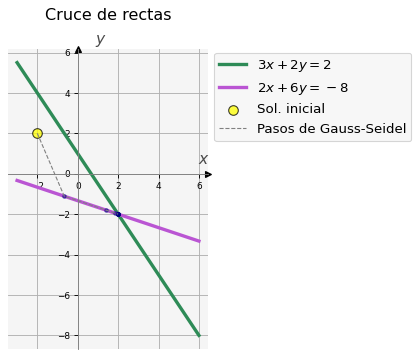

In [15]:
# Puedes usar el mismo código que en el caso anterior.

### BEGIN SOLUTION
v = mvis.Plotter(1,1,[dict(aspect='equal')],title='Cruce de rectas') 
v.set_coordsys(1)
v.plot(1, x, y1, lw = 3, c = 'seagreen', label = '$3x+2y=2$') # Línea recta 1
v.plot(1, x, y2, lw = 3, c = 'mediumorchid', label = '$2x+6y=-8$') # Línea recta 2

# Graficamos los pasos
v.scatter(1, xs[0], ys[0], fc='yellow', ec='k', s = 75, alpha=0.75, zorder=8, label='Sol. inicial')
v.scatter(1, xs[1:], ys[1:], c='navy', s = 10, alpha=0.5, zorder=8)
v.plot(1, xs, ys, c='grey', ls = '--', lw=1.0, zorder=8, label='Pasos de Gauss-Seidel')

v.legend(ncol = 1, frameon=True, loc='best', bbox_to_anchor=(2.05, 1.01))
v.grid()
v.show()
### END SOLUTION

**Graficación de los errores de Jacobi y Gauss-Seidel**

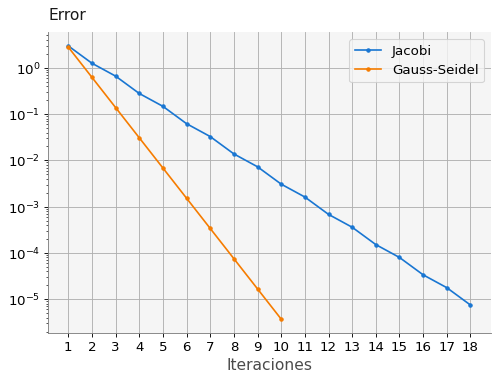

In [16]:
# Utiliza el código del caso anterior adaptado para que pueda graficar ambos errores.

### BEGIN SOLUTION
# Lista con el número de las iteraciones máxima
it_max = max(itJ, itG)+1
l_it_max = list(range(1,it_max)) 

# Listas con el número de las iteraciones para cada algoritmo
l_itJ = list(range(1,itJ+1)) 
l_itG = list(range(1,itG+1)) 

# Parámetros para los ejes
a_p = dict(yscale='log', xlabel='Iteraciones', xticks = l_it_max)

# Gráficas del error
v = mvis.Plotter(1,1,[a_p]) 
v.axes(1).set_title('Error', loc='left')
v.plot(1, l_itJ, eJ, marker='.', label='Jacobi')
v.plot(1, l_itG, eG, marker='.', label='Gauss-Seidel')
v.legend()
v.grid()
### END SOLUTION

# Método de Sobrerrelajación sucesiva (*Successive Overrelaxation*, SOR)

* Se obtiene apicando una extrapolación a la iteración de Gauss-Seidel.

* Esta extrapolación es un promedio pesado entre la iteración actual y la anterior:
$$
x_i^k = \omega \bar{x}_i^k + (1-\omega)x_i^{k-1}
$$
donde $\bar{x}$ denota una iteración de Gauss-Seidel y $\omega$ es el
factor de extrapolación.

* En términos de matrices tenemos:
$$
\mathbf{x}^k = (\mathbf{D} - \omega \mathbf{L})^{-1}(\omega \mathbf{U} + (1 - \omega )\mathbf{D})\mathbf{x}^{k-1} 
+ \omega (\mathbf{D} - \omega \mathbf{L})^{-1} \mathbf{b}
$$
* Elegir la $\omega$ óptima no es simple, aunque se sabe que si $\omega$ 
está fuera del intervalo $(0,2)$ el método falla.

## Implementación 3.

In [17]:
def sor(A,b,tol,kmax,w,xi,yi):
    N = len(b[0])
    xnew = np.zeros(N)
    xold = np.zeros(N)
    x = np.array([2, -2]) # Solución exacta

    # Solución inicial
    xold[0] = xi
    xold[1] = yi

    xs = [xi]
    ys = [yi]
    
    e = 10
    error = [] 
    
    k = 0
    while(e > tol and k < kmax) :
        for i in range(0,N): # se puede hacer en paralelo
            sigma = 0
            for j in range(0,i):
                sigma += A[i,j] * xnew[j]
            for j in range(i+1,N):
                sigma += A[i,j] * xold[j]                
            sigma = (b[0,i] - sigma) / A[i,i]
            xnew[i] = xold[i] + w * (sigma -xold[i])
            
        # Almacenamos la solución actual
        xs.append(xnew[0])
        ys.append(xnew[1])
        
        e = np.linalg.norm(xnew-x, 2) # Cálculo del error
        error.append(e)
        k += 1
        xold[:] = xnew[:]
        print('{:2d} {:10.9f} ({:10.9f}, {:10.9f})'.format(k, e, xnew[0], xnew[1]))
    return xnew, np.array(xs), np.array(ys), error, k

<div class="alert alert-success">

## **Ejercicio 3.**

<font color="Black">Haciendo uso de la función `sor()` definida en la celda anterior, aproxima la solución del sistema de ecuaciones del Ejercicio 1. Utiliza la solución inicial `(xi, yi) =` $(-2, 2)$, una tolerancia `tol` = $1 \times 10^{-5}$ y `kmax` = $50$ iteraciones. 
Elije el valor de $\omega = 1.09$. Utiliza las variables `solSOR`, `xs`, `ys`, `eSOR` e `itSOR` para almacenar la salida de la función `gauss_seidel()`. Posteriormente grafica las rectas y cómo se va calculando la solución con este método (puedes usar el mismo código que en el caso de Jacobi). Grafica también los errores para los tres métodos (Jacobi, Gauss-Seidel y SOR).
    
<img src='error_JGSSOR.png' width=450px height=auto>

</font>

</div>

**Cálculo de la solución con SOR**

In [18]:
# Solución inicial
# xi, yi = 
# tol = 
# kmax = 

# Método de SOR, probar con w = 1.09, 1.8, 1.99, 2.0
# w = ...
# ...

### BEGIN SOLUTION
# Solución inicial
xi, yi = -2, 2
tol = 1e-5
kmax = 50

# Método de SOR, probar con w = 1.09, 1.8, 1.99, 2.0
w = 1.09
solSOR, xs, ys, eSOR, itSOR = sor(A, b, tol, kmax, w, xi, yi)

#file_answer.write('7', solSOR, 'solSOR es incorrecta: revisa la llamada y ejecución de la función sor() así como sus parámetros de entrada.')
#file_answer.write('8', eSOR[-1], 'eSOR[-1] es incorrecto: revisa la llamada y ejecución de la función sor() así como sus parámetros de entrada.')
#file_answer.write('9', itSOR, 'itSOR es incorrector: revisa la llamada y ejecución de la función sor() así como sus parámetros de entrada.')

### END SOLUTION

 1 2.608651498 (-0.546666667, -1.434711111)
 2 0.182203110 (1.818423407, -1.984903171)
 3 0.006309667 (2.005371531, -2.003310371)
 4 0.001963366 (2.001922098, -2.000400429)
 5 0.000118187 (2.000117990, -2.000006831)
 6 0.000006254 (1.999994345, -1.999997330)


In [19]:
#quizz.eval_numeric('7', solSOR)
#quizz.eval_numeric('8', eSOR[-1])
#quizz.eval_numeric('9', itSOR)

**Gráfica de las rectas, la solución y los pasos realizados**

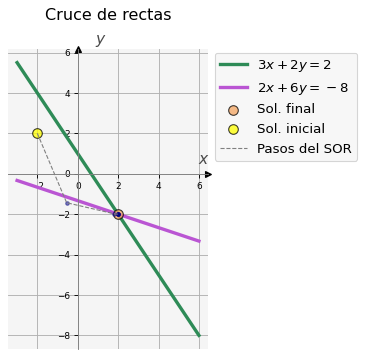

In [20]:
# Puedes usar el mismo código que en el caso anterior.

### BEGIN SOLUTION
v = mvis.Plotter(1,1,[dict(aspect='equal')],title='Cruce de rectas') 
v.set_coordsys(1)
v.plot(1, x, y1, lw = 3, c = 'seagreen', label = '$3x+2y=2$') # Línea recta 1
v.plot(1, x, y2, lw = 3, c = 'mediumorchid', label = '$2x+6y=-8$') # Línea recta 2
v.scatter(1, sol[0], sol[1], fc='sandybrown', ec='k', s = 75, alpha=0.75, zorder=5, label='Sol. final') # Solución

# Graficamos los pasos
v.scatter(1, xs[0], ys[0], fc='yellow', ec='k', s = 75, alpha=0.75, zorder=8, label='Sol. inicial')
v.scatter(1, xs[1:], ys[1:], c='navy', s = 10, alpha=0.5, zorder=8)
v.plot(1, xs, ys, c='grey', ls = '--', lw=1.0, zorder=8, label='Pasos del SOR')
        
v.legend(ncol = 1, frameon=True, loc='best', bbox_to_anchor=(1.78, 1.01))
v.grid()
v.show()
### END SOLUTION

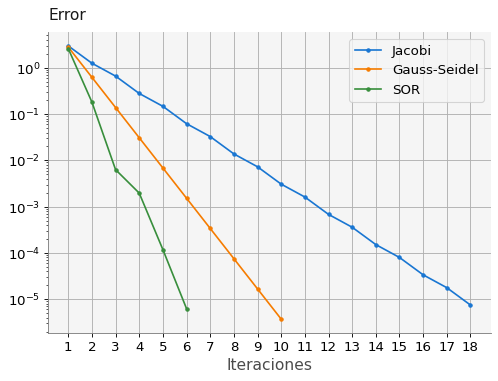

In [21]:
# Utiliza el código del caso anterior adaptado para que pueda graficar los tres errores.

### BEGIN SOLUTION
# Lista con el número de las iteraciones máxima
it_max = max(itJ, itG, itSOR)+1
l_it_max = list(range(1,it_max)) 

# Listas con el número de las iteraciones para cada algoritmo
l_itJ = list(range(1,itJ+1)) 
l_itG = list(range(1,itG+1)) 
l_itSOR = list(range(1,itSOR+1)) 

# Parámetros para los ejes
a_p = dict(yscale='log', xlabel='Iteraciones', xticks = l_it_max)

# Gráficas del error
v = mvis.Plotter(1,1,[a_p]) 
v.axes(1).set_title('Error', loc='left')
v.plot(1, l_itJ, eJ, marker='.', label='Jacobi')
v.plot(1, l_itG, eG, marker='.', label='Gauss-Seidel')
v.plot(1, l_itSOR, eSOR, marker='.', label='SOR')
v.legend()
v.grid()
### END SOLUTION

<div class="alert alert-success">

## **Ejercicio 4.**

<font color="Black">Almacena los errores de los tres métodos en los archivos: `errorJacobi.npy`, `errorGaussSeidel.npy` y `errorSOR.npy` usando la función `np.save()`, checa la documentación [aquí](https://numpy.org/doc/stable/reference/generated/numpy.save.html). </font>
</div>

<div class="alert alert-info">

<font color="Black">

Prueba que tu código funciona usando:
```
print('Error Jacobi = \n{}\n'.format(np.load('errorJacobi.npy')))
print('Error Gauss-Seidel = \n{}\n'.format(np.load('errorGaussSeidel.npy')))
print('Error SOR = \n{}\n'.format(np.load('errorSOR.npy')))

```

<br>La salida debería ser:
    
```
Error Jacobi = 
[2.98142397e+00 1.25707872e+00 ...]

Error Gauss-Seidel = 
[2.81091348e+00 6.24647439e-01 ...]

Error SOR = 
[2.60865150e+00 1.82203110e-01 ...]
```
</font>

</div>

In [22]:
# np.save( ... )
#

### BEGIN SOLUTION
np.save('errorJacobi.npy',eJ)
np.save('errorGaussSeidel.npy', eG)
np.save('errorSOR.npy', eSOR)
### END SOLUTION

In [23]:
print('Error Jacobi = \n{}\n'.format(np.load('errorJacobi.npy')))
print('Error Gauss-Seidel = \n{}\n'.format(np.load('errorGaussSeidel.npy')))
print('Error SOR = \n{}\n'.format(np.load('errorSOR.npy')))

Error Jacobi = 
[2.98142397e+00 1.25707872e+00 6.62538660e-01 2.79350827e-01
 1.47230813e-01 6.20779616e-02 3.27179585e-02 1.37951026e-02
 7.27065745e-03 3.06557835e-03 1.61570166e-03 6.81239633e-04
 3.59044812e-04 1.51386585e-04 7.97877361e-05 3.36414634e-05
 1.77306080e-05 7.47588075e-06]

Error Gauss-Seidel = 
[2.81091348e+00 6.24647439e-01 1.38810542e-01 3.08467871e-02
 6.85484158e-03 1.52329813e-03 3.38510695e-04 7.52245990e-05
 1.67165775e-05 3.71479501e-06]

Error SOR = 
[2.60865150e+00 1.82203110e-01 6.30966741e-03 1.96336589e-03
 1.18187146e-04 6.25365681e-06]

